# Basic ERGM estimation

Simone Santoni  
2024-11-19

This notebook shows how to fit a basic ERGM on a one-mode, directed
network dataset

# Notebook setup

## Load libraries

We need to load three libraries:

-   [`car`](https://cran.r-project.org/web/packages/car/car.pdf), which
    stands for ‘Companion to Applied Regression,’ provides utility
    functions regarding regression models
-   [`sna`](https://cran.r-project.org/web/packages/sna/index.html), a
    [Statnet](https://statnet.org/)’s library, includes many network
    descriptives
-   [`ergm`](), another [Statnet](https://statnet.org/)’s library,
    implements ERGMs.

In [ ]:
library(car)
library(sna)
library(ergm)

## Load data

# ERGM 101

**What is the objective of ERGMs?**

ERGMs test how and to what extent an observed network exhibits certain
tie formation mechanisms. Example of tie formation mechanisms include
(but they are not limited to):

-   In-degree centrality, the tendency of a node $i$ to receive ties
-   Out-degree centrality, the tendency of a node $i$ to send ties
-   Reciprocity, a *dyadic* tendency such that $i \rightarrow j$ &
    $j \rightarrow i$
-   Transitive closure, a *triadic* tendency such that i.e.,
    $i \rightarrow j$ & $j \rightarrow w$ & $i \rightarrow w$
-   Balance, the tendency for two nodes $i$ and $j$ to share alters
    $a = {a_{1}, a_{2}, ..., a_{n}}$
-   Node attributes, i.e., node $i$’s qualities
-   Dyadic attributes, i.e., the similarity (or differences) in nodes
    $i$ and $j$ qualities

**What is the intuition behind ERGMs?**

ERGMs consider observed networks as mixtures of network effects

## The General Form of ERGM

ERGMs estimate the probabilities that the observed network $y$ comes
from the class $Y$ based on a set of endogenous and exogenous tie
formation explanations (aka ‘model effects’). ERGM’s general form is the
following:

where $\theta^{T}$ is the vector of regression coefficients regarding
the model effects $g(y, X)$, and $k(\theta)$ is the summation of the
numerator’s value over the set of all possible networks $y$.

To better understand ERGM’s general form, we can dispense the numerator
of the previous equation as follows:

This equation highlights that the probability of observing a particular
network in a set of networks―e.g., ten-node networks exhibiting
significant in-degree popularity and reciprocity―as a function of many
$g(y)$. We can also dispense the equation in terms of the log odds of an
edge:

where $\delta[(y, X)]$ is the ‘change’ statistic, that is, the change in
$g(y,X)$ when the value of only the $ij$ dyad is changed from 0 to 1.

## Examples of Model Effects

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%"
data-layout-align="left">
<figure id="fig-A">
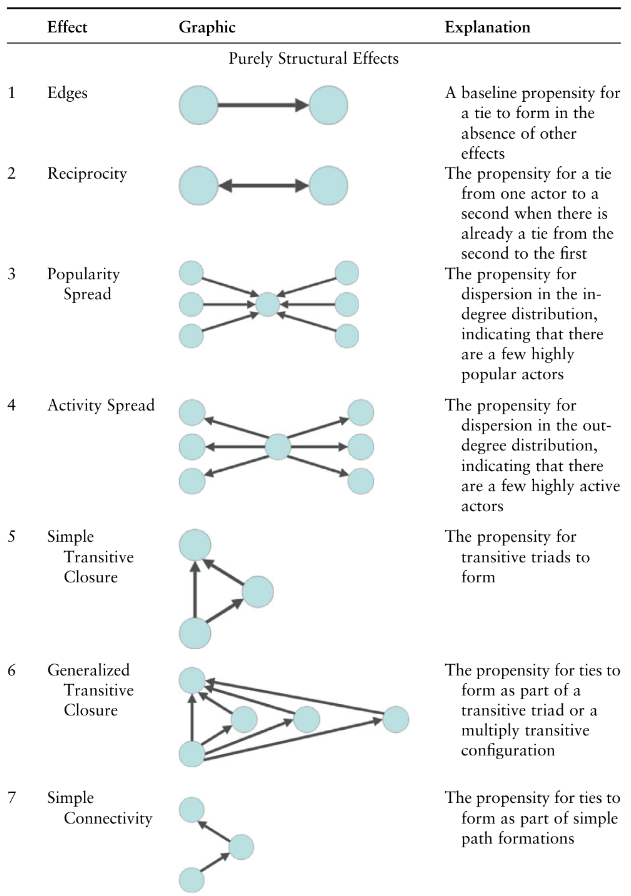
</figure>
</div></td>
<td style="text-align: left;"><div width="50.0%"
data-layout-align="left">
<figure id="fig-B">
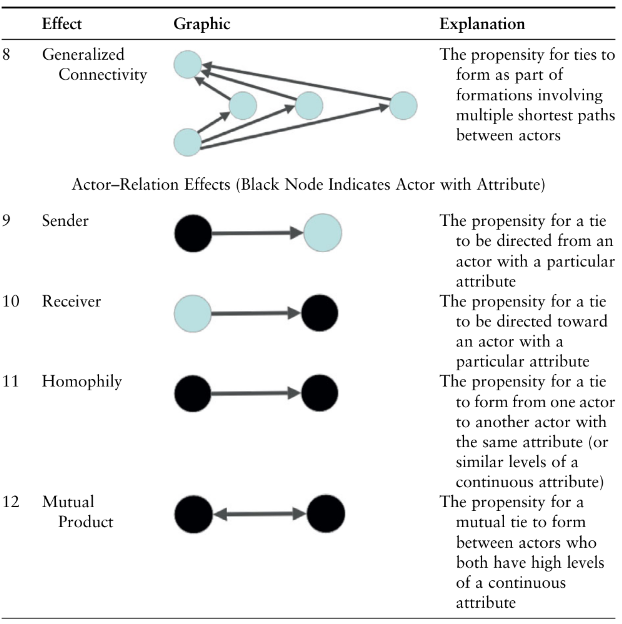
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 1: Model Effects reported in [Rawlings et al. (2023,
pp. 322-323)](https://www.cambridge.org/core/books/network-analysis/C9202FD5420BE99225FEED4B6214DBB7)

## How Do I Compute the Change Statistic $\delta[g(y, X)]$?

ERGM libraries, like R’s `ergm`, do that for you. However, it is
important that you familiarize yourself with computing the change
statistic $\delta[g(y, X)]$. Here are two key premises:

-   Mainly, the procedure aims to create the regressors for the
    above-displayed Logit model. For example, one may want to regress
    the likelihood to observe a tie from $i$ to $j$ against $i$ and/or
    $j$’s degree, the existence of the tie from $j$ to $i$, the fact
    that $i$ and $j$ are involved in a triad to which a third node $w$,
    and so on and so forth
-   Overall, the procedure consists of a ‘thought experiment.’ For each
    tie involving a pair of nodes $\{i, j\}$, we ask ourselves:
    -   “Does adding the tie from $i$ to $j$ make the relationship
        ‘reciprocal’, that is, $i \rightarrow j$ & $j \rightarrow i$?”
    -   “Does adding the tie from $i$ to $j$ make the triad involving
        $i$, $j$, and $w$ transitive?”
    -   “Is the tie from $i$ to $j$ involving two similar (equivalent)
        or dissimilar (different) nodes”

The below-displayed figure illustrates this kind of thought experiment
visually. The algorithm will replicate the thought experiment for us,
iterating over all possible pairs of node \${i, j} creating the input
for the Logit regression. The final dataset will have $N \cdot (N -1)$
rows (aka ties) and $K + 1$ columns, where $K$ is the number of selected
model effects. The $+ 1$ signifies the column with the dependent
variable information (aka, whether a tie is present or absent).

<figure id="fig-thought-exp">
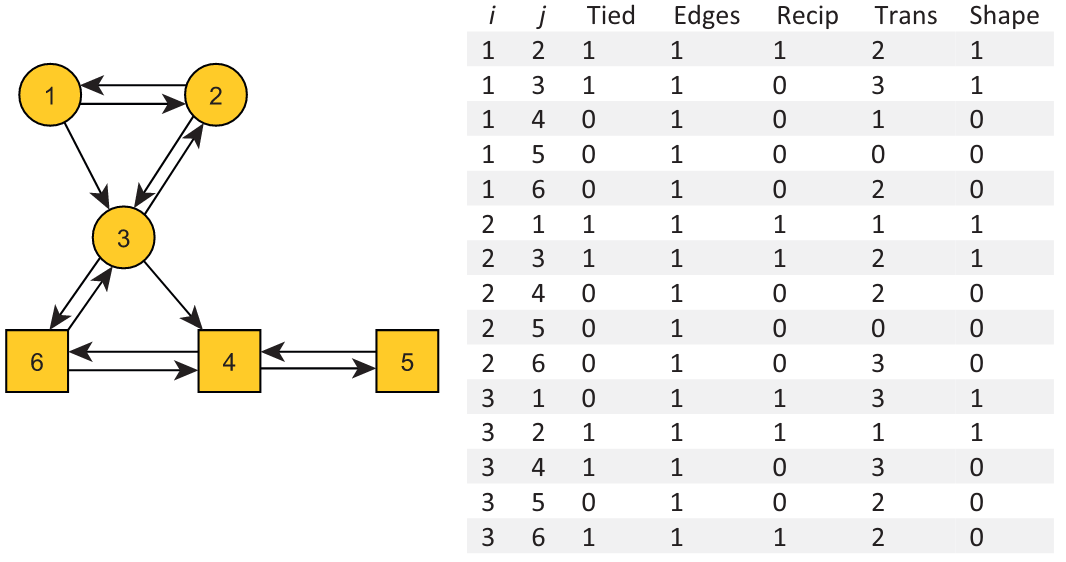
<figcaption>Figure 2: Thought experiments regarding the impact of <span
class="math inline"><em>i</em> → <em>j</em></span> on model effects.
Source is <a
href="https://www.cambridge.org/core/books/network-analysis/C9202FD5420BE99225FEED4B6214DBB7">Rawlings
et al. (2023, p. 320)</a></figcaption>
</figure>

# Arrange network data

# ERGM estimation